In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import plot_model
from keras.datasets import fashion_mnist

In [2]:
# Definicja etykiet klas
labels = ["T-shirt/top","Spodnie","Sweter","Sukienka","Płaszcz","Sandał","Koszula","Sneaker","Torebka","but"]

4422102/4422102 [==============================] - 0s 0us/step
etykieta  but


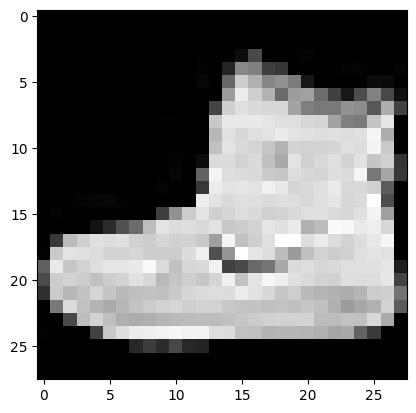

In [3]:
# Załaduj dane
(x_train,y_train), (x_test, y_test) = fashion_mnist.load_data()
# podgląd
print("etykieta ",labels[y_train[0]])
plt.imshow(x_train[0], cmap='gray')

In [4]:
# Przetwórz dane
# Dane typu float32, modele często lepiej radzą sobie z danymi liczbowymi w formie zmiennoprzecinkowej.
# Normalizujemy dane do przedziału [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# Konwertuj etykiety na kategorie
# kodowanie kategoryczne (one-hot encoding) na zbiorze etykiet treningowych
# zamienia etykiety klas na postać binarną w formie wektorów zer i jedynek
# 3 -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Zdefiniuj model za pomocą Functional API
# Conv2D(liczba filtrów,...)
input_shape=(28,28,1)
inputs = Input(shape=input_shape)
x = Conv2D(16, kernel_size=(3, 3), padding='same',activation='relu')(inputs)#64
x = Conv2D(16, kernel_size=(3, 3), padding='same',activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)#128
x = Dropout(0.25)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [7]:
# Skompiluj model
# 'categorical_crossentropy' średnia z logarytmu przewidywanych prawdopodobieństw dla prawdziwej klasy
# Optymalizator Adam (Adaptive Moment Estimation) wykorzystuje adaptacyjne momenty gradientu do efektywnego dostosowywania wag modelu podczas treningu
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trenuj model
# batch_size liczba próbek treningowych użytych do jednej aktualizacji wag modelu podczas jednej iteracji treningowej
history = model.fit(x_train, y_train, batch_size=1000, epochs=3, verbose='auto', validation_data=(x_test, y_test))

Epoch 1/3
60/60 [==============================] - 102s 2s/step - loss: 0.8671 - accuracy: 0.7018 - val_loss: 0.4746 - val_accuracy: 0.8292
Epoch 2/3
60/60 [==============================] - 65s 1s/step - loss: 0.4650 - accuracy: 0.8344 - val_loss: 0.3930 - val_accuracy: 0.8632
Epoch 3/3
60/60 [==============================] - 73s 1s/step - loss: 0.4026 - accuracy: 0.8561 - val_loss: 0.3538 - val_accuracy: 0.8755


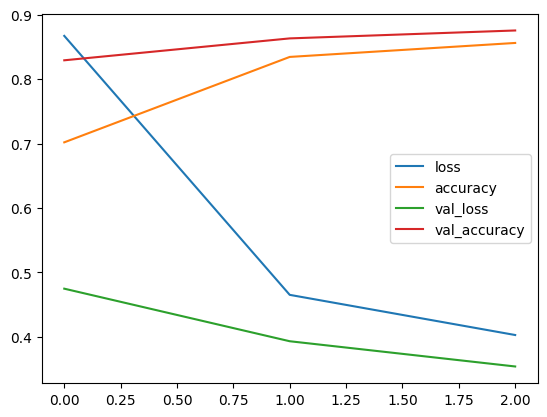

In [8]:
import pandas as pd
# Tworzenie wykresu z historią
df = pd.DataFrame(history.history)
ax = df.plot()
# Zapisywanie wykresu do pliku
fig = ax.get_figure()
fig.savefig('history_plot.png')

In [9]:
# Ocena modelu
loss, accuracy = model.evaluate(x_test, y_test, verbose='auto')
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 5s 16ms/step - loss: 0.3538 - accuracy: 0.8755
Test loss: 0.3537709712982178
Test accuracy: 0.8755000233650208


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                             

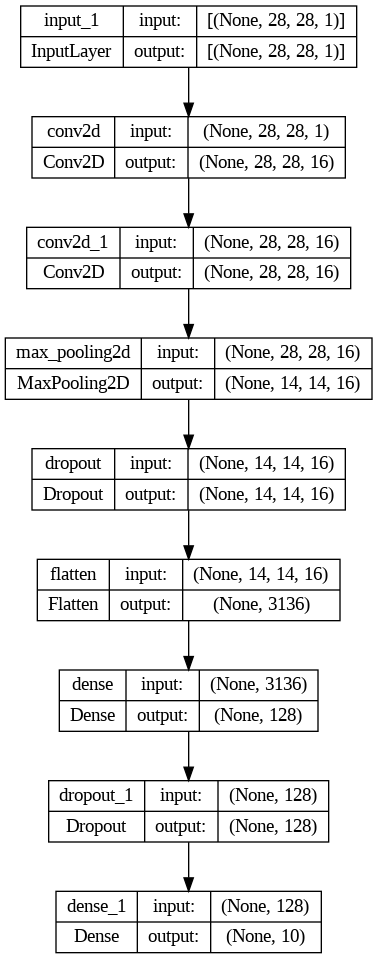

In [10]:
# Wizualizacja modelu
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
# export modelu CNN
model.save("my_model_fashion_mnist.keras")

313/313 [==============================] - 3s 10ms/step
Przykład źle sklasyfikowany nr 1


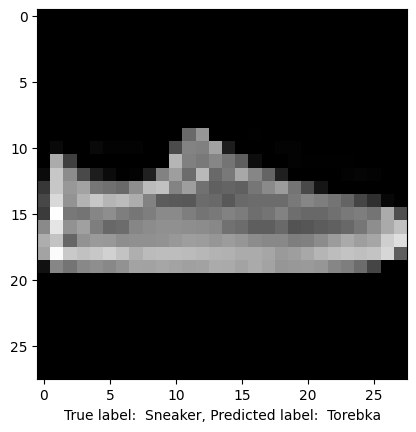

Przykład źle sklasyfikowany nr 2


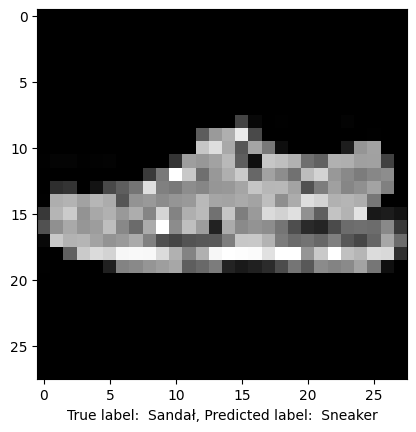

Przykład źle sklasyfikowany nr 3


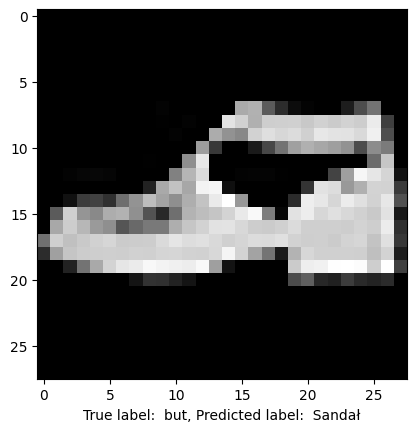

Przykład źle sklasyfikowany nr 4


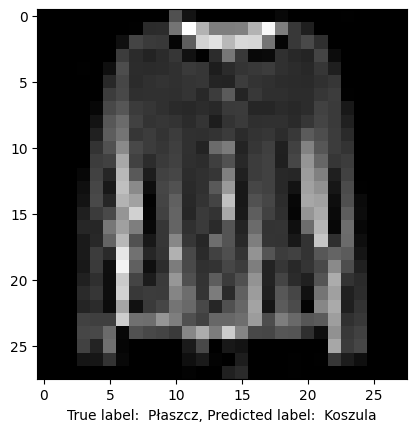

Przykład źle sklasyfikowany nr 5


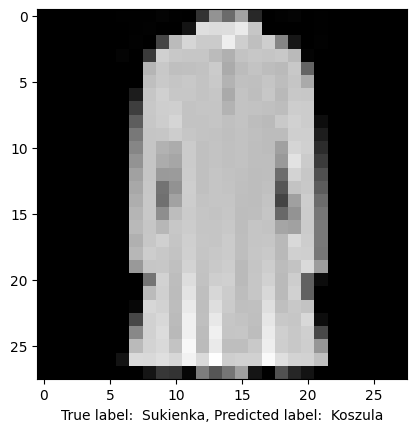

In [12]:
# Wyświetlanie przykładów źle sklasyfikowanych
predictions = np.argmax(model.predict(x_test), axis=1);
y_test_flat = np.argmax(y_test, axis=1);
incorrect_indices = np.nonzero(predictions != y_test_flat)[0]

for i in range(5):
    idx = incorrect_indices[i]
    print("Przykład źle sklasyfikowany nr", i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.xlabel(f"True label:  {labels[y_test_flat[idx]]}, Predicted label:  {labels[predictions[idx]]}")
    plt.show()

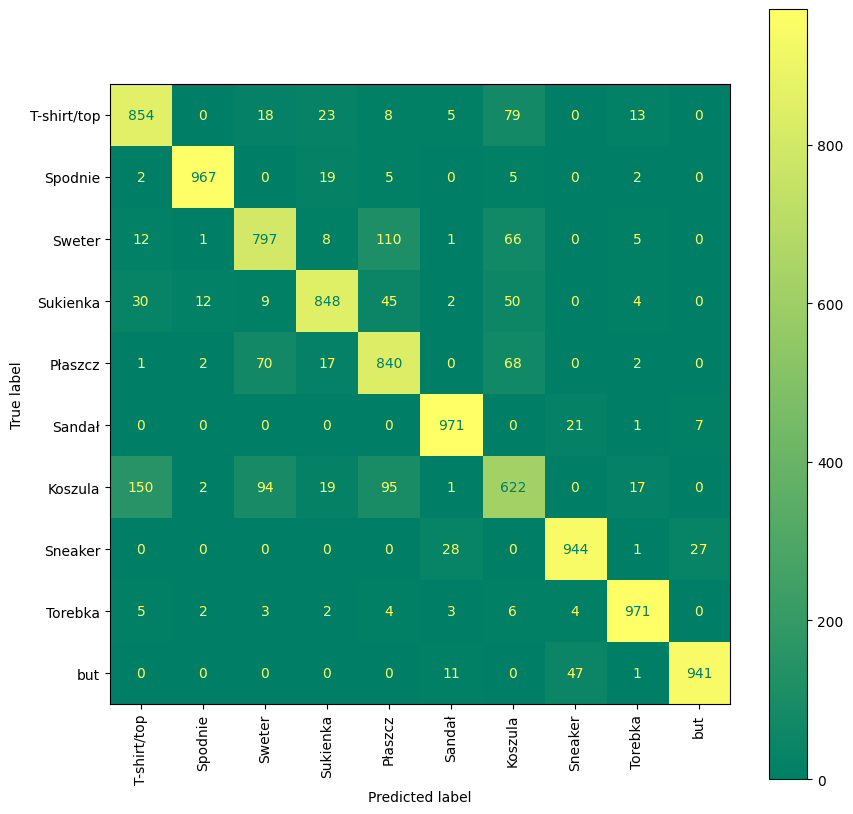

In [15]:
# Visualisation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Tworzenie macierzy pomyłek
cm = confusion_matrix(y_test_flat, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

# Zapisywanie wykresu do pliku
plt.savefig('confusion_matrix.png')
plt.show()